COVID-19-Detection-and-Lung-Segmentation-using-UNet


In [ ]:
!pip install -q kaggle 


In [ ]:
!mkdir ~/.kaggle/ 


In [ ]:
! cp '/content/drive/MyDrive/kaggle/kaggle.json' ~/.kaggle/ 


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                      5MB  2022-11-13 15:47:17           4772        150  1.0              
mvieira101/global-cost-of-living                                Global Cost of Living                                 1MB  2022-12-03 16:37:53            636         32  0.9705882        
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                                      9KB  2022-10-06 08:55:25          21218        570  1.0              
thedevastator/jobs-dataset-from-glassdoor                   

importation de dataset

In [ ]:
! kaggle datasets download -d anasmohammedtahir/covidqu

100% 1.15G/1.15G [00:58<00:00, 23.4MB/s]
100% 1.15G/1.15G [00:58<00:00, 21.1MB/s]


In [ ]:
!unzip /content/covidqu.zip -d database-data

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: database-data/Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/lung masks/non_COVID (10835).png  
  inflating: database-data/Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/lung masks/non_COVID (10836).png  
  inflating: database-data/Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/lung masks/non_COVID (10837).png  
  inflating: database-data/Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/lung masks/non_COVID (10838).png  
  inflating: database-data/Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/lung masks/non_COVID (10839).png  
  inflating: database-data/Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/lung masks/non_COVID (10840).png  
  inflating: database-data/Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/lung masks/non_COVID (10841).png  
  inflating: database-data/Lung Segmentation Data/Lung Segmentation 

In [ ]:
import os
for dirname, _, filenames in os.walk('database-data/Lung Segmentation Data/Lung Segmentation Data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
database-data/Lung Segmentation Data/Lung Segmentation Data/Test/Normal/images/Normal (8458).png
database-data/Lung Segmentation Data/Lung Segmentation Data/Test/Normal/images/Normal (9353).png
database-data/Lung Segmentation Data/Lung Segmentation Data/Test/Normal/images/Normal (8847).png
database-data/Lung Segmentation Data/Lung Segmentation Data/Test/Normal/images/Normal (8389).png
database-data/Lung Segmentation Data/Lung Segmentation Data/Test/Normal/images/Normal (8656).png
database-data/Lung Segmentation Data/Lung Segmentation Data/Test/Normal/images/Normal (8301).png
database-data/Lung Segmentation Data/Lung Segmentation Data/Test/Normal/images/Normal (207).png
database-data/Lung Segmentation Data/Lung Segmentation Data/Test/Normal/images/Normal (8350).png
database-data/Lung Segmentation Data/Lung Segmentation Data/Test/Normal/images/Normal (406).png
database-data/Lung Segmentation Data/Lung Segmentat

Importer les bibliothèques


In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow
import keras 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D, AveragePooling2D
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.models import Model
from keras.layers import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt


In [ ]:
import tensorflow as tf
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D #images are two dimensional. Videos are three dimension.
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Normal Patient



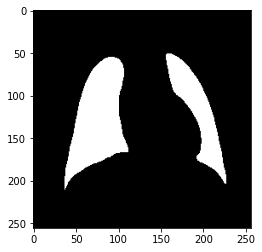

In [ ]:
plt.imshow(cv2.imread("./database-data/Lung Segmentation Data/Lung Segmentation Data/Test/Normal/lung masks/Normal (9716).png"))


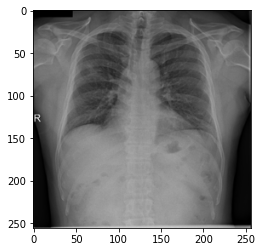

In [ ]:
plt.imshow(cv2.imread("./database-data/Lung Segmentation Data/Lung Segmentation Data/Test/COVID-19/images/covid_1017.png"))

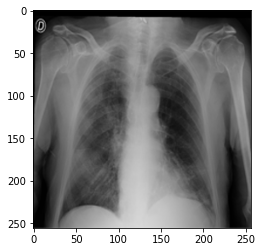

In [ ]:
plt.imshow(cv2.imread("./database-data/Lung Segmentation Data/Lung Segmentation Data/Test/COVID-19/images/covid_1583.png"))

*Prétraitement* des images


1-Diviser les données 

In [ ]:
train_datagen=ImageDataGenerator(rescale=1/255,
                                shear_range=0.2,
                                zoom_range=2,
                                horizontal_flip=True)
training_set=train_datagen.flow_from_directory('./database-data/Lung Segmentation Data/Lung Segmentation Data/Train/',
                                              target_size=(224,224),
                                              batch_size=32)

Found 43430 images belonging to 3 classes.


In [ ]:
training_set.class_indices


{'COVID-19': 0, 'Non-COVID': 1, 'Normal': 2}

In [ ]:
test_datagen=ImageDataGenerator(rescale=1/255,
                               shear_range=0.2,
                               zoom_range=2,
                               horizontal_flip=True)
test_set=test_datagen.flow_from_directory('database-data/Lung Segmentation Data/Lung Segmentation Data/Test/',
                                         target_size=(224,224),
                                         batch_size=32)

Found 13576 images belonging to 3 classes.


In [ ]:
test_set.class_indices


{'COVID-19': 0, 'Non-COVID': 1, 'Normal': 2}

In [ ]:
Val_datagen=ImageDataGenerator(rescale=1/255,
                               shear_range=0.2,
                               zoom_range=2,
                               horizontal_flip=True)
Val_set=Val_datagen.flow_from_directory('database-data/Lung Segmentation Data/Lung Segmentation Data/Val/',
                                         target_size=(224,224),
                                         batch_size=32)

Found 10834 images belonging to 3 classes.


In [ ]:
Val_set.class_indices


{'COVID-19': 0, 'Non-COVID': 1, 'Normal': 2}

In [ ]:
from tensorflow import keras

inputs = keras.Input(shape=(784,))

In [ ]:
from tensorflow.keras.models import Model


In [ ]:
import tensorflow as tf
train_batch_size = 64  # Set the training batch size 
valid_batch_size = 64  # Set the tetsing batch size
dir = r'./database-data/Lung Segmentation Data/Lung Segmentation Data/'
img_size = 32  # Set the image size


train_set = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir, labels='inferred', label_mode='categorical', class_names=None,
    color_mode='rgb', batch_size=train_batch_size, image_size=(img_size, img_size),
    shuffle=True, seed=12, validation_split=.2, subset="training",
    interpolation='nearest', follow_links=False)

valid_set = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir, labels='inferred', label_mode='categorical', class_names=None,
    color_mode='rgb', batch_size=valid_batch_size, image_size=(img_size, img_size),
    shuffle=False, seed=12, validation_split=.2, subset="validation",
    interpolation='nearest', follow_links=False)


Found 67840 files belonging to 3 classes.
Using 54272 files for training.
Found 67840 files belonging to 3 classes.
Using 13568 files for validation.


In [ ]:
import numpy as np 
import pandas as pd 
import cv2
from PIL import Image 
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50


augmentation de données 

In [ ]:
IMG_WIDTH=224
IMG_HEIGHT=224
IMG_DIM = (IMG_WIDTH, IMG_HEIGHT)
BATCH_SIZE = 25
IMG_DIR = pathlib.Path('./database-data/Lung Segmentation Data/Lung Segmentation Data/')
TRAIN_DIR = './database-data/Lung Segmentation Data/Lung Segmentation Data/Train'
VAL_DIR = './database-data/Lung Segmentation Data/Lung Segmentation Data/Val'

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Specify the values for all arguments to data_generator_with_aug.
data_generator_with_aug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                              horizontal_flip = True,
                                              width_shift_range = 0.2,
                                              height_shift_range = 0.2
                                                )
            
data_generator_no_aug = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_generator = data_generator_with_aug.flow_from_directory(
                                        directory=TRAIN_DIR,
                                        target_size=IMG_DIM,
                                        batch_size=BATCH_SIZE,
                                        class_mode='categorical')

validation_generator = data_generator_no_aug.flow_from_directory(
                                        directory=VAL_DIR,
                                        target_size=IMG_DIM,batch_size=BATCH_SIZE,
                                        class_mode='categorical')

Found 43430 images belonging to 3 classes.
Found 10834 images belonging to 3 classes.


Création de model

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
import tensorflow.keras as keras

resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT,IMG_WIDTH,3),pooling='max')

output = resnet.layers[-1].output
output = tf.keras.layers.Flatten()(output)
resnet = Model(resnet.input, output)

res_name = []
for layer in resnet.layers:
    res_name.append(layer.name)
res_name[-22:]

94765736/94765736 [==============================] - 5s 0us/step


['conv5_block2_1_conv',
 'conv5_block2_1_bn',
 'conv5_block2_1_relu',
 'conv5_block2_2_conv',
 'conv5_block2_2_bn',
 'conv5_block2_2_relu',
 'conv5_block2_3_conv',
 'conv5_block2_3_bn',
 'conv5_block2_add',
 'conv5_block2_out',
 'conv5_block3_1_conv',
 'conv5_block3_1_bn',
 'conv5_block3_1_relu',
 'conv5_block3_2_conv',
 'conv5_block3_2_bn',
 'conv5_block3_2_relu',
 'conv5_block3_3_conv',
 'conv5_block3_3_bn',
 'conv5_block3_add',
 'conv5_block3_out',
 'max_pool',
 'flatten']

In [ ]:
set_trainable = False
for layer in resnet.layers:
    if layer.name in res_name[-22:]:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
resnet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout

num_classes = 3

model = Sequential()
model.add(resnet)
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 26,738,563
Trainable params: 12,082,179
No

In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 31.4 MB/s 


.Génération de model

In [ ]:
import tensorflow_addons as tfa


In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8,
                                              restore_best_weights=False
                                              )

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                   factor=0.2,
                                   patience=4,
                                   verbose=1,
                                   min_delta=5*1e-3,min_lr = 5*1e-7,
                                   )

Compiler le model

In [ ]:
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics=['accuracy',tfa.metrics.F1Score(num_classes=num_classes)])


In [ ]:
model.fit(train_generator,steps_per_epoch=np.ceil(float(16464) / float(BATCH_SIZE)),
                        epochs = 40,callbacks=[early_stop,reduce_lr],
                          validation_steps=np.ceil(float(4116) / float(BATCH_SIZE)),
                        validation_data = validation_generator)

Epoch 1/40
659/659 [==============================] - 233s 331ms/step - loss: 1.6127 - accuracy: 0.5422 - f1_score: 0.5419 - val_loss: 0.6994 - val_accuracy: 0.6832 - val_f1_score: 0.6840 - lr: 1.0000e-04
Epoch 2/40
659/659 [==============================] - 213s 323ms/step - loss: 0.8133 - accuracy: 0.6302 - f1_score: 0.6302 - val_loss: 0.6898 - val_accuracy: 0.6861 - val_f1_score: 0.6858 - lr: 1.0000e-04
Epoch 3/40
659/659 [==============================] - 211s 320ms/step - loss: 0.7587 - accuracy: 0.6593 - f1_score: 0.6594 - val_loss: 0.6319 - val_accuracy: 0.7278 - val_f1_score: 0.7267 - lr: 1.0000e-04
Epoch 4/40
659/659 [==============================] - 208s 316ms/step - loss: 0.7295 - accuracy: 0.6734 - f1_score: 0.6731 - val_loss: 0.6059 - val_accuracy: 0.7212 - val_f1_score: 0.7205 - lr: 1.0000e-04
Epoch 5/40
659/659 [==============================] - 211s 320ms/step - loss: 0.7091 - accuracy: 0.6835 - f1_score: 0.6837 - val_loss: 0.6132 - val_accuracy: 0.7047 - val_f1_score:

In [ ]:
def get_diagnostic_plot(model,name):
    training_loss = model.history.history[name]
    test_loss = model.history.history[f'val_{name}']

    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)

    # Visualize loss history
    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend([f'Training {name}', f'Val {name}'])
    plt.xlabel('Epoch')
    plt.ylabel(name)

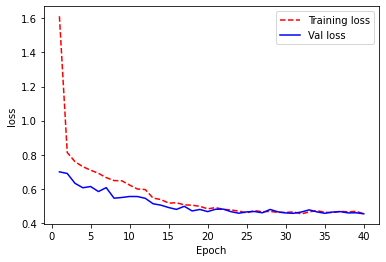

In [ ]:
get_diagnostic_plot(model,'loss')


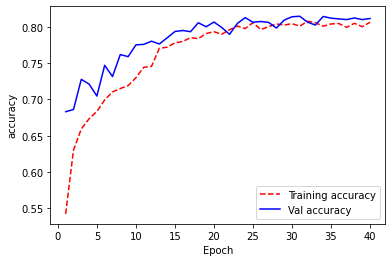

In [ ]:
get_diagnostic_plot(model,'accuracy')


In [ ]:
f1_score_history = model.history.history['f1_score']
f1_scores = [np.mean(item) for item in  f1_score_history]
f1_score_val_hist = model.history.history['val_f1_score']
f1_scores_val = [np.mean(item) for item in  f1_score_val_hist]

Text(0, 0.5, 'F1 Score')

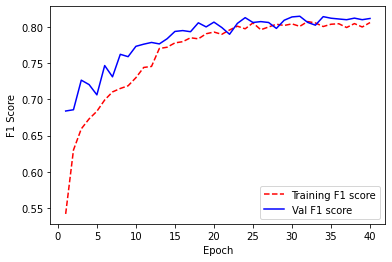

In [ ]:
training_loss = f1_scores
test_loss = f1_scores_val

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

    # Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training F1 score', 'Val F1 score'])
plt.xlabel('Epoch')
plt.ylabel('F1 Score')

In [ ]:
train_path ='./database-data/Lung Segmentation Data/Lung Segmentation Data/Train'

In [ ]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# We need to recreate our validation generator with shuffle = false

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = data_generator_with_aug.flow_from_directory(
                                        directory=TRAIN_DIR,
                                        target_size=IMG_DIM,
                                        batch_size=BATCH_SIZE,
                                        class_mode='categorical')

class_labels = train_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())


nb_validation_samples = 43430 
batch_size = 5
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(train_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

#print('Confusion Matrix')
#print(confusion_matrix(test_generator.classes, y_pred))
print("\n\n")
print('Classification Report\n')
target_names = list(class_labels.values())
print(classification_report(train_generator.classes, y_pred, target_names=target_names))

Found 43430 images belonging to 3 classes.


<ipython-input-52-5b5c203cf4f4>:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(train_generator, nb_validation_samples // batch_size+1)





Classification Report

              precision    recall  f1-score   support

    COVID-19       0.35      0.35      0.35     15316
   Non-COVID       0.33      0.28      0.30     14416
      Normal       0.32      0.36      0.34     13698

    accuracy                           0.33     43430
   macro avg       0.33      0.33      0.33     43430
weighted avg       0.33      0.33      0.33     43430



In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "red")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm = confusion_matrix(train_generator.classes, y_pred)
np.set_printoptions(precision=2)

[[5358 4410 5548]
 [5161 4072 5183]
 [4791 3953 4954]]


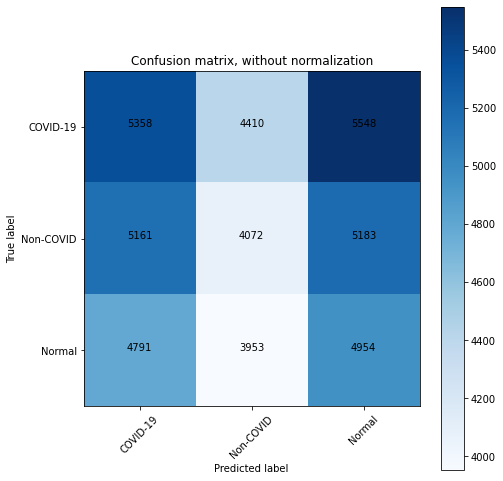

In [ ]:
plt.figure(figsize=(7,7))
plot_confusion_matrix(cm, classes=target_names,
                      title='Confusion matrix, without normalization')

In [ ]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr)
    plt.axis([0,1,0,1]) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.show() 

In [ ]:
def perf_measure(y_actual, y_pred):
    class_id = set(y_actual).union(set(y_pred))
    TP = []
    FP = []
    TN = []
    FN = []

    for index ,_id in enumerate(class_id):
        TP.append(0)
        FP.append(0)
        TN.append(0)
        FN.append(0)
        for i in range(len(y_pred)):
            if y_actual[i] == y_pred[i] == _id:
                TP[index] += 1
            if y_pred[i] == _id and y_actual[i] != y_pred[i]:
                FP[index] += 1
            if y_actual[i] == y_pred[i] != _id:
                TN[index] += 1
            if y_pred[i] != _id and y_actual[i] != y_pred[i]:
                FN[index] += 1
               
    return class_id,TP, FP, TN, FN

In [ ]:
print(perf_measure(train_generator.classes, y_pred))


({0, 1, 2}, [5358, 4072, 4954], [9952, 8363, 10731], [9026, 10312, 9430], [19094, 20683, 18315])
